### Тема “Обучение без учителеля”

#### Задание 1

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [72]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import matplotlib

import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')

In [4]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]

In [5]:
X = pd.DataFrame(data, columns=feature_names)
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [18]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(354, 13)
После:	(354, 2)


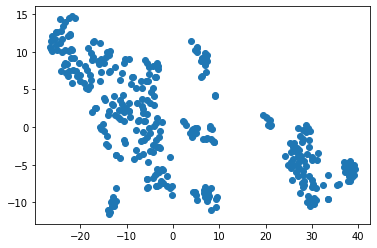

In [69]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Задание 2

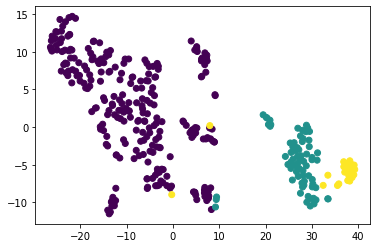

In [25]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [59]:
print('Claster 0')
print('CRIM: {} and price: {}'.format(X_train[(labels_train == 0)]['CRIM'].median(), 
                                      y_train[(labels_train == 0)]['price'].median()))

Claster 0
CRIM: 0.13158 and price: 23.1


In [60]:
print('Claster 1')
print('CRIM: {} and price: {}'.format(X_train[(labels_train == 1)]['CRIM'].median(), 
                                      y_train[(labels_train == 1)]['price'].median()))

Claster 1
CRIM: 7.9159 and price: 16.05


In [61]:
print('Claster 2')
print('CRIM: {} and price: {}'.format(X_train[(labels_train == 2)]['CRIM'].median(), 
                                      y_train[(labels_train == 2)]['price'].median()))

Claster 2
CRIM: 10.6718 and price: 13.1


#### Задание 3

In [78]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
labels_test = kmeans.predict(X_test_scaled)

ValueError: Incorrect number of features. Got 13 features, expected 1